# Método da posição falsa
***

O método da posição falsa é um outro método para encontrar o zero de uma função e foi desenvolvido no Egito antigo cerca de 1.650 a.C!

Assim como o método da bisseção, a idéia é começar com um intervalo inicial $x_a$ e $x_b$ e reduzí-lo gradualmente até atingir uma tolerância pré-estabelecida. A única diferença com relação ao método da bisseção é que o valor escolhido para a divisão do intervalo não é mais o centro. Na realidade o valor é calculado aproximando a função por uma reta e escolhendo o ponto onde esta reta atinge o zero.

Esta estratégia de escolha pode ser mais eficaz e muitas vezes faz com que o método da posição falsa seja bem mais eficiente que o método da bisseção. Se a função for muito próxima de uma reta, a convergência se dá em apenas uns poucos passos. Mostramos o resultado em um gráfico:

***
### Exemplos
***

Importa as bibliotecas

In [1]:
import numpy
import matplotlib.pyplot as matplot
%matplotlib inline

***

Definimos a nossa função $f(x) = x^2 + 2x + 1$ e o valor de $y_0$

Queremos encontrar o valor de $x$ para o qual $f(x) = y_0$

In [2]:
def f(x):
    return x*x + 2*x + 1

y0 = 42

***

Definimos $g(x)$, a função que queremos encontrar os zeros

In [3]:
def g(x):
    return f(x) - y0

***

Vamos plotar o gráfico com a aproximação linear, a expressão que fornece o zero da reta é:

$$x_k = \frac{x_0.g(x_1)-x_1.g(x_0)}{g(x_1)-g(x_0)}$$

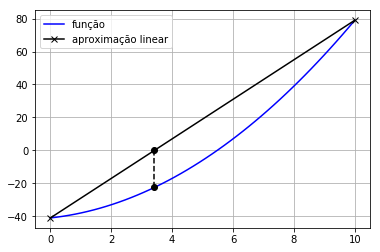

In [4]:
x0, x1 = 0, 10

# A expressão abaixo fornece o zero da reta
x_false = (x0 * g(x1) - x1 * g(x0)) / (g(x1) - g(x0))
x = numpy.linspace(0, 10)
y = g(x)

matplot.plot(x, y, 'b-', label='função')
matplot.plot([x0, x1], [g(x0), g(x1)], 'kx-', label='aproximação linear')
matplot.plot([x_false, x_false], [0, g(x_false)], 'ko--')
matplot.legend(loc='best')
matplot.grid(True)

***

Faremos algumas iterações manuais do algoritmo para ver como se dá a convergência. Note que como o novo valor **x_false** é menor que zero, substituímos $x_a$ no intervalo.

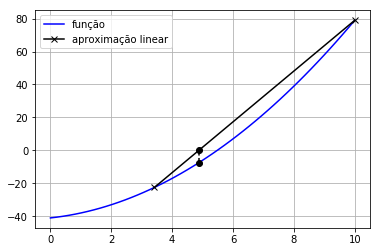

xa: 3.4166667, ya: -22.4930556


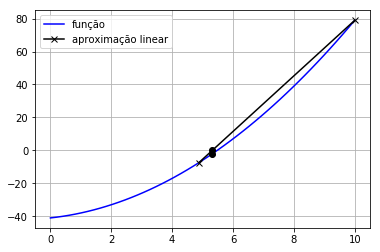

xa: 4.8756757, ya: -7.4764354


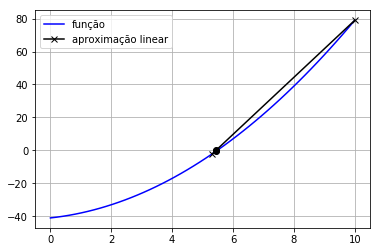

xa: 5.3187060, ya: -2.0739550


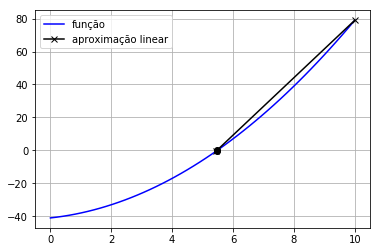

xa: 5.4384583, ya: -0.5462552


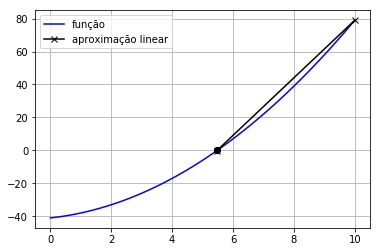

xa: 5.4697830, ya: -0.1419079


In [5]:
xa, xb = x0, x1
ya, yb = g(x0), g(x1)

for _ in range(5):
    x_false = (yb * xa - ya * xb) / (yb - ya)
    g_false = g(x_false)
    if g_false <= 0:
        xa, ya = x_false, g_false
    else:
        xb, yb, = x_false, g_false

    # Fazemos o gráfico
    x_false = (yb * xa - ya * xb) / (yb - ya)
    matplot.plot(x, y, 'b-', label='função')
    matplot.plot([xa, xb], [ya, yb], 'kx-', label='aproximação linear')
    matplot.plot([x_false, x_false], [0, g(x_false)], 'ko--')
    matplot.legend(loc='best')
    matplot.grid(True)
    matplot.show()
    print('xa: %.7f, ya: %.7f' % (xa, ya))

***
### Algoritmo de illinois
***

Vemos que apesar da escolha inicial de novo intervalo ser boa, o método da posição falsa gera uma convergência muito lenta para certas classes de funções (infelizmente isto inclui a nossa $g(x)$ considerada). Isto ocorre porque um dos pontos extremos se mantêm fixo em cada iteração do método, enquanto o outro converge lentamente para a posição correta.

Este comportamento torna o método da posição falsa muito mais ineficiente que a bisseção para algumas funções. Como nem sempre sabemos se nossas funções vão se comportar bem ou mal com este método, é necessário criar uma estratégia para contornar este problema. Uma estratégia comum é utilizar o **algoritmo de Illinois**, que atualiza a posição da nova divisão com uma regra um pouco diferente da posição falsa:

$$x' = \frac{\frac{1}{g_b}x_a-g_a.x_b}{\frac{1}{g_b}-g_a}$$

(note a presença dos fatores de 1/2)

Esta regra deve ser utilizada apenas se houver duas atualizações seguidas com o mesmo ponto.

Quando fazemos isto, o resultado melhora significativamente:

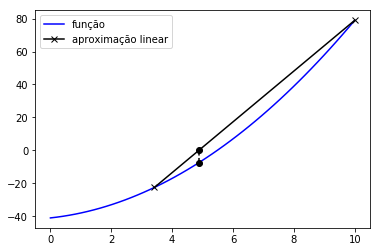

xa: 3.4166667, ya: -22.4930556


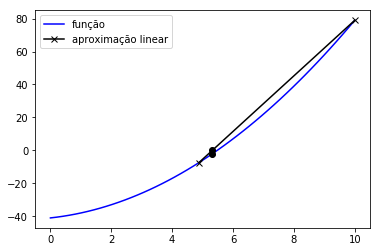

xa: 4.8756757, ya: -7.4764354


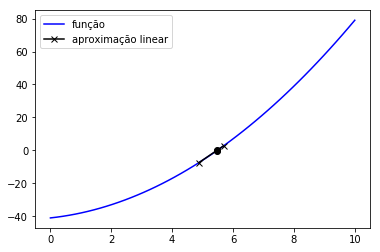

xa: 4.8756757, ya: -7.4764354


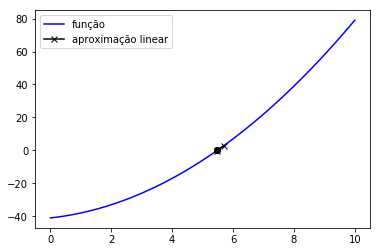

xa: 5.4706063, ya: -0.1312538


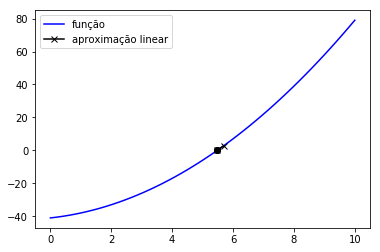

xa: 5.4805786, ya: -0.0021006


In [6]:
xa, xb = 0, 10
ya, yb = g(xa), g(xb)
last_point = None
illinois = False

for _ in range(5):
    if illinois:
        x_false = (0.5 * yb * xa - ya * xb) / (0.5 * yb - ya)
        illinois = False
    else:
        x_false = (yb * xa - ya * xb) / (yb - ya)
        
    g_false = g(x_false)
    
    if g_false <= 0:
        xa, ya = x_false, g_false
        illinois = last_point == 0
        last_point = 0
    else:
        xb, yb, = x_false, g_false
        illinois = last_point == 1
        last_point = 1
        
    # Fazemos o gráfico
    x_false = (yb * xa - ya * xb) / (yb - ya)
    matplot.plot(x, y, 'b-', label='função')
    matplot.plot([xa, xb], [ya, yb], 'kx-', label='aproximação linear')
    matplot.plot([x_false, x_false], [0, g(x_false)], 'ko--')
    matplot.legend(loc='best')
    matplot.show()
    print('xa: %.7f, ya: %.7f' % (xa, ya))

***
### Fazendo a função
***

Finalmente, criamos a nossa função para encontrar o zero pela posição falsa

In [7]:
def fake_position(g, x0, x1, x_tolerance=1e-6, y_tolerance=1e-6, illinois=True):
    """
    Calcula o zero de g(x) dentro do intervalo (x0, x1) utilizando o método da posição falsa.
    
    Argumentos:
    
        g: uma função de uma única variável
        x0, x1: intervalo inicial para a busca do zero de g(x)
        x_tolerance: tolerância em x (retorna quando intervalo for menor que x_tolerance)
        y_tolerance: tolerância em y (retorna quando |g(x)| < y_tolerance)
        illinois: se verdadeiro, usa correção de Illinois
    
    Retorno:
    
        Retorna um zero de g(x) (valor de x em que g(x) = 0).
    """
    
    # Calcula xa/ya e xb/yb
    if g(x0) < g(x1):
        # Função crescente
        xa, xb = x0, x1
        ya, yb = g(x0), g(x1)
    else:
        # Função decrescente
        xa, xb = x1, x0
        ya, yb = g(x1), g(x0)

    # Atualiza o intervalo até atingir o critério de parada
    iterations = 0
    use_illinois = False
    last_point = -1
    
    while True:
        iterations += 1
        
        if use_illinois:
            x_false = (0.5 * yb * xa - ya * xb) / (0.5 * yb - ya)
            use_illinois = False
        else:
            x_false = (yb * xa - ya * xb) / (yb - ya)
            
        g_false = g(x_false)

        if g_false < 0:
            xa, ya = x_false, g_false
            use_illinois = illinois and last_point == 0
            last_point = 0
        elif g_false > 0:
            xb, yb, = x_false, g_false
            use_illinois = illinois and last_point == 1
            last_point = 1
        else:
            return x_false

        if abs(xb - xa) < x_tolerance or abs(g_false) < y_tolerance:
            break
    
    # Resultado
    if abs(ya) < abs(yb):
        return xa
    else:
        return xb

***

Testamos a função

In [8]:
x1 = fake_position(g, 0, 10)
print('posição falsa: x = %.7f, y = %.7f' % (x1, g(x1)))

posição falsa: x = 5.4807407, y = -0.0000000


***

In [9]:
x1 = fake_position(numpy.cos, 0, 4)
print("posição falsa: x = %.7f, y = %.7f" % (x1, numpy.cos(x1)))

posição falsa: x = 1.5707963, y = -0.0000000
